         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0               

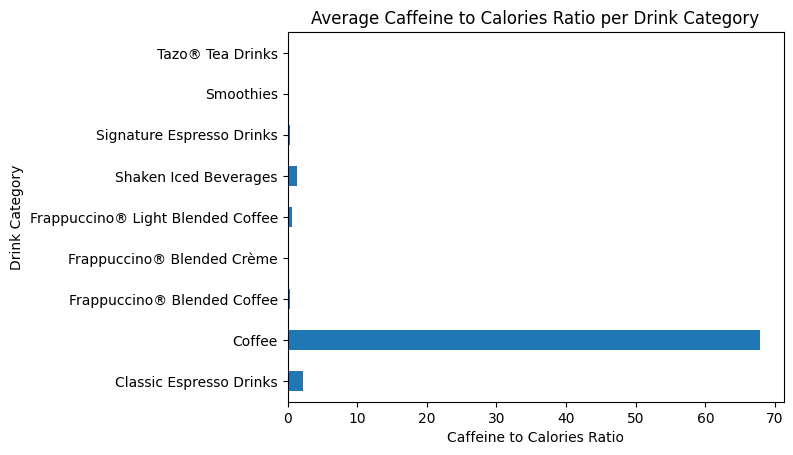

Column 'Sugars (g)' does not exist in the DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Import the necessary libraries
# (Already done above)

# Step 2: Load the Starbucks dataset from your local file
starbucks = pd.read_csv('starbucks.csv')

# Step 3: Display the first 10 entries of the DataFrame using the head() function
print(starbucks.head(10))

# Step 4: Determine the total number of entries in ‘starbucks’
total_entries = len(starbucks)
print(f"Total number of entries: {total_entries}")

# Step 5: Print all the column names in the DataFrame
print(starbucks.columns)

# Step 6: Find out how the DataFrame is indexed
print(starbucks.index)

# Check if 'Sugars (g)' column exists
if 'Sugars (g)' in starbucks.columns:
    # Step 7: Determine the drink that contains the most amount of sugar on average
    max_sugar_drink = starbucks.loc[starbucks['Sugars (g)'].idxmax()]
    print(f"Drink with the most sugar on average: {max_sugar_drink['Beverage']}")
else:
    print("Column 'Sugars (g)' does not exist in the DataFrame.")

# Step 8: Find out how many different drink categories there are
num_categories = starbucks['Beverage_category'].nunique()
print(f"Number of different drink categories: {num_categories}")

# Step 9: Identify the 5 most frequent drink categories
top_5_categories = starbucks['Beverage_category'].value_counts().head(5)
print("Top 5 most frequent drink categories:")
print(top_5_categories)

# Step 10: Find out the average calorie content per drink category
avg_calories_per_category = starbucks.groupby('Beverage_category')['Calories'].mean()
print("Average calorie content per drink category:")
print(avg_calories_per_category)

# Ensure 'Caffeine (mg)' and 'Calories' are numeric
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['Calories'] = pd.to_numeric(starbucks['Calories'], errors='coerce')

# Step 11: Create a new column ‘caffeine_to_calories’ that represents the ratio of caffeine to calories in each drink
starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']

# Step 12: Find the drink category that, on average, has the highest ‘caffeine_to_calories’ ratio
highest_ratio_category = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean().idxmax()
print(f"Drink category with the highest caffeine to calories ratio: {highest_ratio_category}")

# Step 13: Create a horizontal bar plot that shows the average ‘caffeine_to_calories’ ratio for each drink category
avg_ratio_per_category = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
avg_ratio_per_category.plot(kind='barh')
plt.xlabel('Caffeine to Calories Ratio')
plt.ylabel('Drink Category')
plt.title('Average Caffeine to Calories Ratio per Drink Category')
plt.show()

# Step 14: Formulate and answer a question about the dataset
# Question: What is the relationship between sugar and caffeine across different drink categories?
# Answer: Let's visualize this relationship using a scatter plot.
if 'Sugars (g)' in starbucks.columns:
    plt.scatter(starbucks['Sugars (g)'], starbucks['Caffeine (mg)'])
    plt.xlabel('Sugar (g)')
    plt.ylabel('Caffeine (mg)')
    plt.title('Relationship between Sugar and Caffeine in Starbucks Drinks')
    plt.show()
else:
    print("Column 'Sugars (g)' does not exist in the DataFrame.")
